In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from pandas import DataFrame
import sklearn
from pandas import DataFrame
import scikitplot as skplt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
svm=LinearSVC()
kn=KNeighborsClassifier()
rf=RandomForestClassifier()
gnb=GaussianNB()

In [2]:
import matplotlib as mt
axes= {"linewidth" : 3}
mt.rc("axes", **axes)
font={"weight": 'bold', "family": "Times new roman", "size": 20}
mt.rc("font", **font)

In [3]:
dataset=pd.read_csv("literature composition data final listtttt 9.csv")
print(dataset.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 986', 'Unnamed: 987', 'Unnamed: 988', 'Unnamed: 989',
       'Unnamed: 990', 'Unnamed: 991', 'Unnamed: 992', 'Unnamed: 993',
       'Unnamed: 994', 'Unnamed: 995'],
      dtype='object', length=996)


In [4]:
x=dataset[["Cohesive energy", "Melting point","Pauling","Mulliken","ENTROPY","Min radius","Pseudopotential","Atomic mismatch","VEC","Density","Volume","Average mass","Covalent radius(pm)","Enthalpy "]]
y=dataset[["Formation boolean"]]
x

,Cohesive energy,Melting point,Pauling,Mulliken,ENTROPY,Min radius,Pseudopotential,Atomic mismatch,VEC,Density,Volume,Average mass,Covalent radius(pm),Enthalpy
0,6.42833,2455.00,1.3833,3.648790,14.870291,0.419355,2.17600,0.050463,4.50,9.17980,11.305264,106.63490,114.872,0.756
1,6.24000,2266.33,1.4911,3.609810,9.125247,0.419355,2.18205,0.041678,4.34,6.46800,11.713020,76.55901,113.850,2.640
2,5.70500,2232.50,1.5325,3.636250,11.525651,0.419355,2.11125,0.040861,4.75,6.68750,10.681000,70.99825,112.000,-5.500
3,5.49000,2122.40,1.6060,3.273000,13.380867,0.419355,1.86500,0.123725,4.60,25.75000,28.944800,62.41560,110.000,-42.400
4,6.65200,2513.40,1.4540,3.652600,13.380867,0.419355,2.23300,0.040399,4.40,9.86000,11.956800,118.28740,117.200,2.720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,7.02750,2833.75,1.8200,3.935250,11.520000,0.351351,2.22750,0.145308,5.50,13.05375,12.092500,138.69150,115.250,-9.750
367,5.92000,2211.25,1.5050,3.610025,11.520000,0.333000,2.31375,0.164963,4.75,9.77975,15.321500,127.45900,121.250,-10.250
368,6.72000,2448.50,1.6000,3.753775,11.520000,0.333000,2.26875,0.159938,5.25,10.80750,13.059000,128.45900,119.250,-9.750
369,6.22000,2277.75,1.8400,3.768400,11.520000,0.333000,2.22375,0.170777,6.00,9.86250,12.141500,108.45925,116.250,-11.250


In [5]:
from scipy.stats import pointbiserialr

biserial_corr, p_value = pointbiserialr(dataset["VEC"],dataset["Mulliken"])
print("Biserial Correlation Coefficient:", biserial_corr)


Biserial Correlation Coefficient: 0.7935322741045849


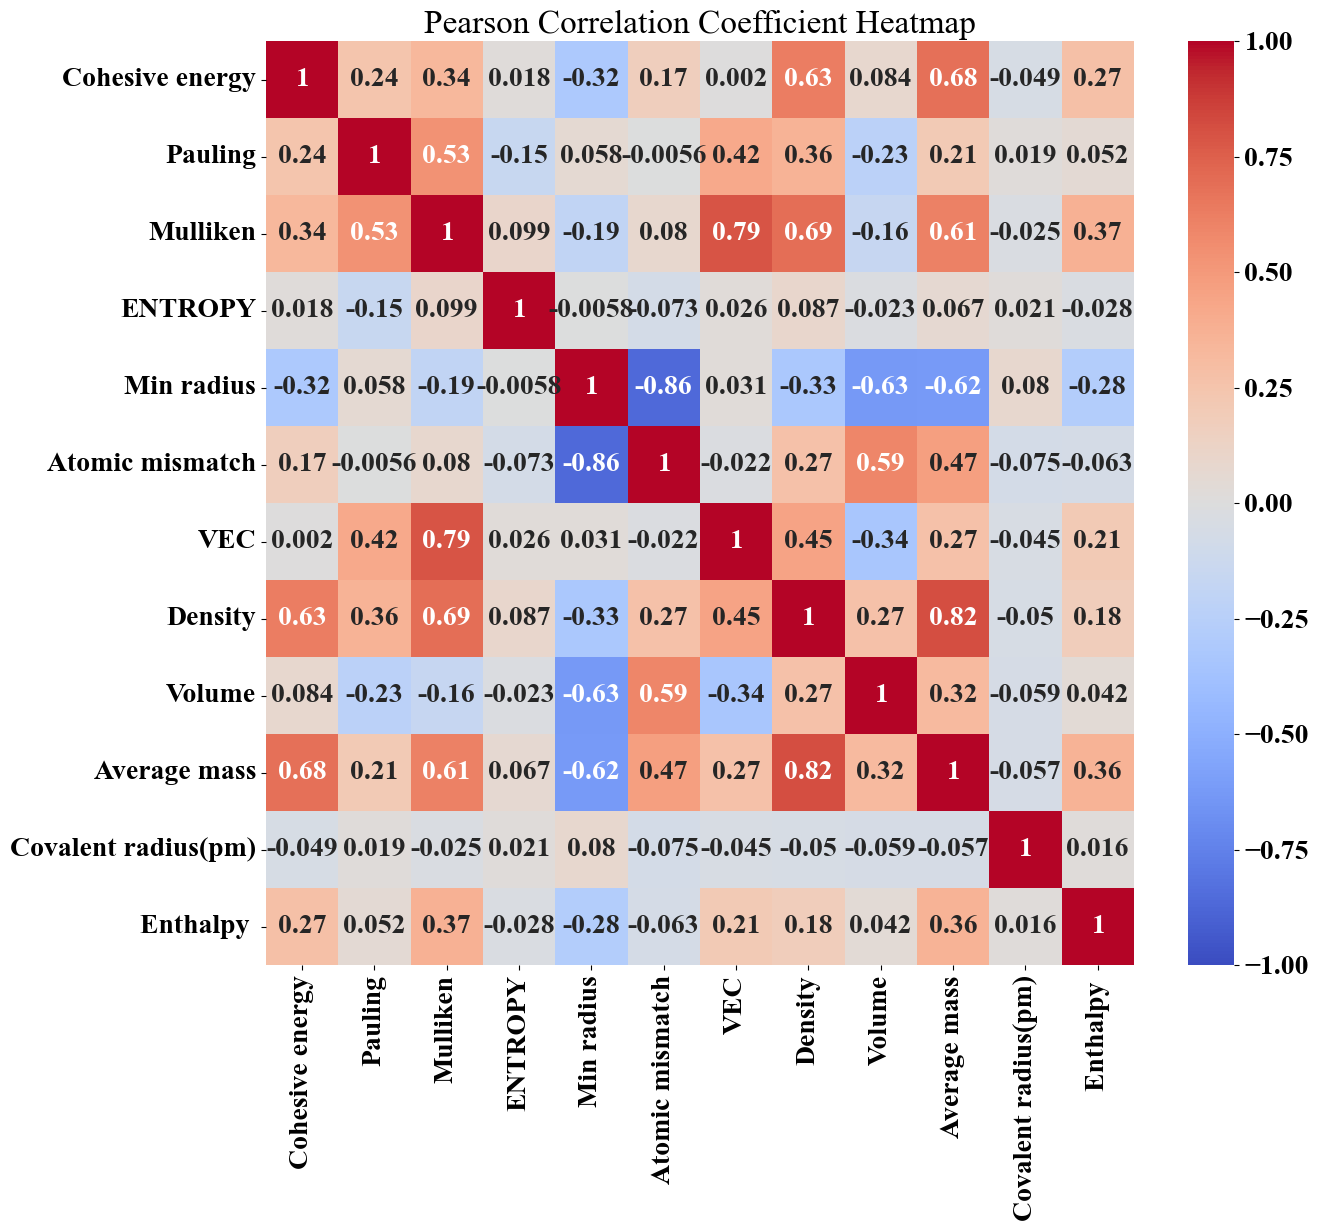

In [6]:
x1=dataset[["Cohesive energy","Pauling","Mulliken","ENTROPY","Min radius","Atomic mismatch","VEC","Density","Volume","Average mass","Covalent radius(pm)","Enthalpy "]]

correlation_matrix = x1.corr()
f = plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Coefficient Heatmap')
#plt.figure(figsize=(1, 10))
plt.show()

f.savefig('Pearson Correlation Coefficient Heatmap.jpg',dpi=600, bbox_inches='tight')

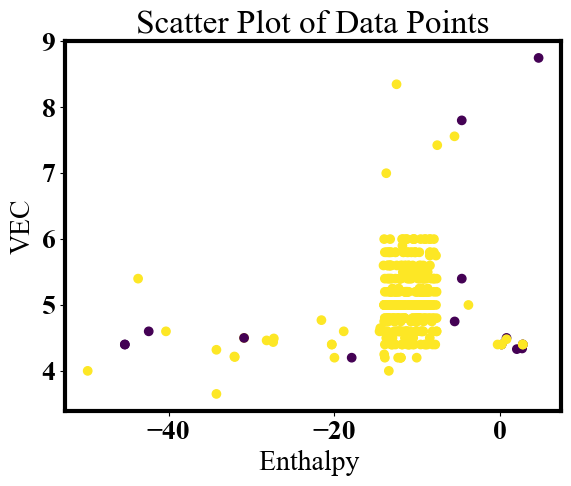

<Figure size 640x480 with 0 Axes>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


plt.scatter(dataset["Enthalpy "], dataset['VEC'], c=dataset["Formation boolean"], cmap='viridis')

plt.title('Scatter Plot of Data Points')
plt.xlabel('Enthalpy ')
plt.ylabel('VEC')


plt.show()
f1 = plt.figure()
#shap.summary_plot(shap_values)
f1.savefig('scatterplot before  adasyn test set.jpg',dpi=600, bbox_inches='tight')

In [8]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy='minority', random_state=42)
x_train3, y_train3 = ada.fit_resample(x, y)
df2=pd.concat([x_train3, y_train3], axis=1)
x_train2 = x_train3.head(50).copy()
x_train1 = x_train3.drop(x_train3.head(50).index)
y_train2 = y_train3.head(50).copy()
y_train1 = y_train3.drop(y_train3.head(50).index)
df3=pd.concat([x_train2, y_train2], axis=1)
df1=pd.concat([x_train1, y_train1], axis=1)
print(y_train1)
value_counts = y_train1.value_counts()
print(value_counts)

     Formation boolean
50                   1
51                   1
52                   1
53                   1
54                   1
..                 ...
706                  0
707                  0
708                  0
709                  0
710                  0

[661 rows x 1 columns]
Formation boolean
0                    340
1                    321
Name: count, dtype: int64


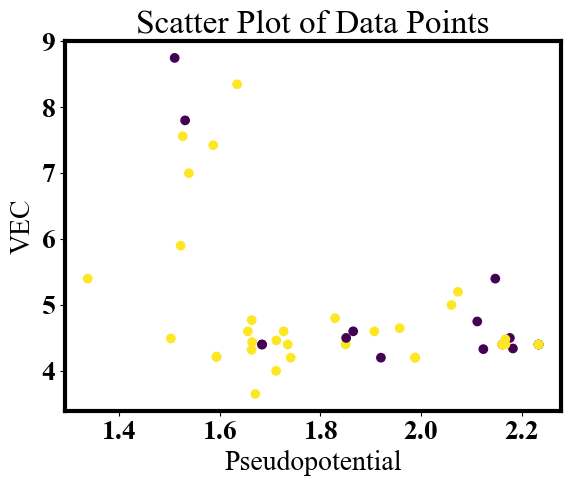

Formation boolean
1                    35
0                    15
Name: count, dtype: int64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(x_train2["Pseudopotential"], x_train2['VEC'], c=y_train2["Formation boolean"], cmap='viridis')

plt.title('Scatter Plot of Data Points')
plt.xlabel('Pseudopotential')
plt.ylabel('VEC')

plt.show()
value_counts2 = y_train2.value_counts()
print(value_counts2)

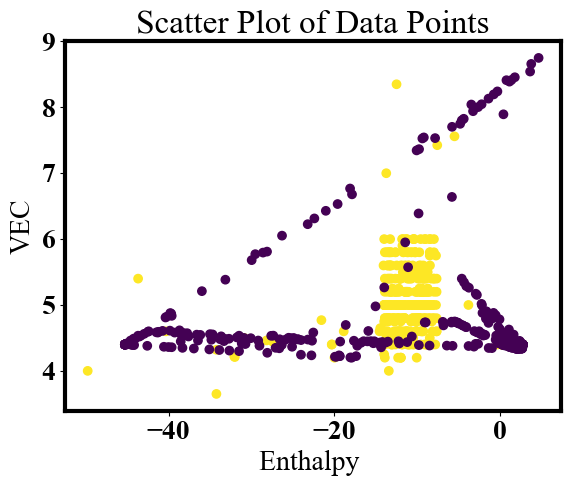

<Figure size 640x480 with 0 Axes>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


plt.scatter(x_train3["Enthalpy "], x_train3['VEC'], c=y_train3["Formation boolean"], cmap='viridis')

plt.title('Scatter Plot of Data Points')
plt.xlabel('Enthalpy ')
plt.ylabel('VEC')


plt.show()
f3 = plt.figure()
#shap.summary_plot(shap_values)
f3.savefig('scatterplot after adasyn test set.jpg',dpi=600, bbox_inches='tight')

In [11]:
new_df = df2.loc[(df2['Pseudopotential'] <=2.0)]
df7 = df2[~df2.isin(new_df)].dropna()
print(len(df7))
print(len(new_df))
new_df.to_csv('new_df.csv', index=False)
value_counts1 = new_df["Formation boolean"].value_counts()
print(value_counts1)

524
187
Formation boolean
0    160
1     27
Name: count, dtype: int64


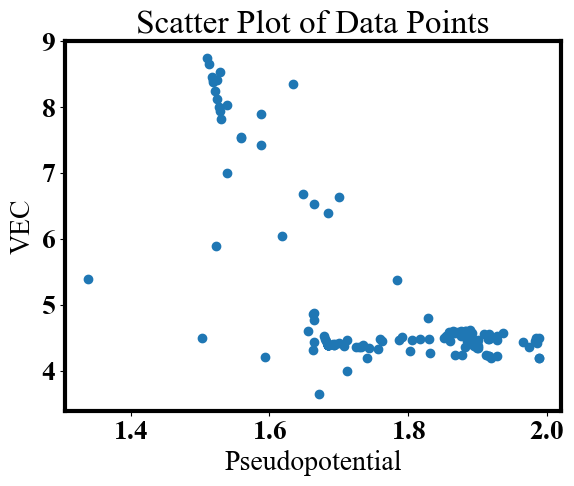

,Cohesive energy,Melting point,Pauling,Mulliken,ENTROPY,Min radius,Pseudopotential,Atomic mismatch,VEC,Density,Volume,Average mass,Covalent radius(pm),Enthalpy,Formation boolean
0,4.611250,1748.052889,1.683159,3.871021,12.385912,0.443452,1.700452,0.051300,6.640172,7.534250,8.976598,63.719881,105.885289,-5.829081,0
1,5.493783,2121.000384,1.602822,3.283630,13.380867,0.419355,1.867081,0.121768,4.584869,25.049209,28.257173,63.065377,110.113482,-41.473984,0
2,5.188000,1922.400000,1.620000,3.209693,13.380867,0.419355,1.684000,0.124385,4.400000,5.455800,10.826800,58.238600,110.600000,-45.280000,0
3,5.507649,2060.769938,1.632889,3.342389,13.186589,0.419355,1.762272,0.146667,4.446869,6.251559,10.796312,66.967846,111.256170,-38.540192,0
4,5.584023,2087.611481,1.527021,3.537205,13.380867,0.419355,1.916713,0.075098,4.223908,8.331295,11.853295,78.566311,112.820691,-19.383164,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,5.054000,1980.000000,1.608000,3.572600,13.380867,0.448276,1.656000,0.051569,4.600000,5.786000,9.404000,54.138600,108.800000,-14.560000,1
128,4.318000,1750.500000,0.859500,4.077748,12.910092,0.464286,1.634475,0.029840,8.350000,7.721490,7.305170,47.825792,89.388710,-12.510000,1
129,3.987000,1421.560000,1.638200,3.480512,10.926469,0.464286,1.503163,0.054355,4.492000,4.467619,9.401803,39.330032,107.989800,-27.310000,1
130,3.765000,1345.300000,1.723000,3.695600,12.453259,0.464286,1.522500,0.029880,5.900000,5.496100,8.885000,40.992100,100.287000,-11.800000,1


In [12]:
import pandas as pd
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split

X = new_df.drop('Formation boolean', axis=1)
y = new_df['Formation boolean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

enn = EditedNearestNeighbours(sampling_strategy='auto')
X_train_resampled, y_train_resampled = enn.fit_resample(X_train, y_train)
df4=pd.concat([X_train_resampled, y_train_resampled], axis=1)
plt.scatter(df4["Pseudopotential"], df4['VEC'])
plt.title('Scatter Plot of Data Points')
plt.xlabel('Pseudopotential')
plt.ylabel('VEC')
plt.show()
df4


     Cohesive energy  Melting point   Pauling  Mulliken    ENTROPY  \
0           6.428330    2455.000000  1.383300  3.648790  14.870291   
1           6.240000    2266.330000  1.491100  3.609810   9.125247   
2           5.705000    2232.500000  1.532500  3.636250  11.525651   
3           5.490000    2122.400000  1.606000  3.273000  13.380867   
4           6.652000    2513.400000  1.454000  3.652600  13.380867   
..               ...            ...       ...       ...        ...   
675         6.232612    2265.357487  1.494223  3.607134   9.201944   
676         5.978376    2253.967900  1.564986  3.533535  13.170552   
678         6.009348    2264.354148  1.541405  3.550035  13.228908   
685         6.107124    2248.838804  2.859971  3.559210  10.504687   
688         6.201812    2261.303080  3.344134  3.592517   9.521694   

     Min radius  Pseudopotential  Atomic mismatch       VEC    Density  \
0      0.419355         2.176000         0.050463  4.500000   9.179800   
1      0.41

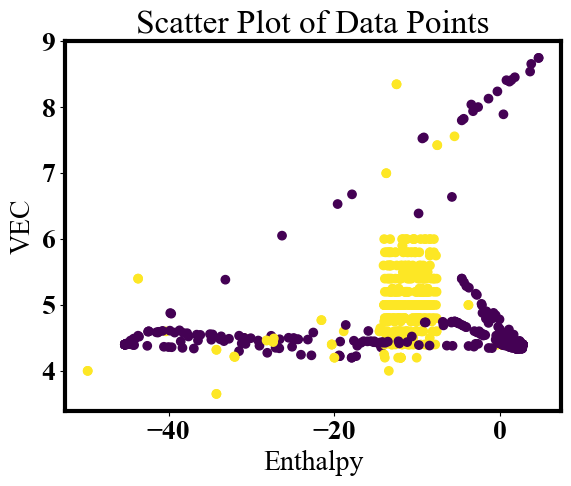

<Figure size 640x480 with 0 Axes>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df6=pd.concat([df3, df4], axis=0)
df5=pd.concat([df6, df7], axis=0)
print(df5)

plt.scatter(df5["Enthalpy "], df5['VEC'], c= df5["Formation boolean"], cmap='viridis')

plt.title('Scatter Plot of Data Points')
plt.xlabel('Enthalpy')
plt.ylabel('VEC')


plt.show()
f4 = plt.figure()
f4.savefig('scatterplot after oversampling and undersampling test set.jpg',dpi=600, bbox_inches='tight')

In [14]:
df5.to_csv('segregated3.csv', index=False)